# Dimensionality reduction 

#### Advantages:
-	Less misleading data means model accuracy improves.
-	Less dimensions mean less computing. Algorithms train faster.
-	Less data means less storage space required.
-	Less dimensions allow usage of algorithms unfit for a large number of dimensions
-	It removes redundant features and noise.
-	It helps in visualizing data.

In order to reduce dimensionality you can use methods presented in this notebook or some feature selection methods presented in another notebook.


### How to use the notebook:
###### 1. Import all needed libararies below
###### 2. Uncomment and import chosen dataset
###### 3. Run all linear and non-linear methods
###### 4. Run all testing functions
###### 5. Test various techniques and compare results

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
Axes3D
import seaborn as sns
import numpy as np
from time import time
sns.set()
from math import floor
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### S-curve Dataset

S-curve dataset. You can use it to test methods on non-linear dataset. Regression problem.

In [35]:
n_points = 1000
X, y = datasets.samples_generator.make_s_curve(n_points, random_state=0)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

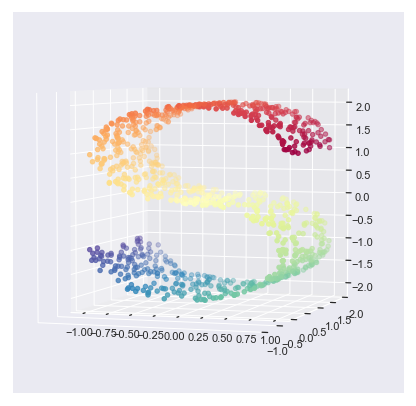

In [37]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
ax.set_yticks(np.arange(-1, 2.1, 0.5))

plt.show()

### Iris dataset

Simple 4-dimensional dataset with additional 20 noise dimensions. Classification problem.

In [2]:
from sklearn import datasets

# The iris dataset
iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Mnist

Dataset containing images of 10 digits. Each image has resolution 28x28 -> 784 dimensions. Classification problem.

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Santander

Dataset containing transactions' data. 200 dimensions. Classification problem.
You can download the dataset from the site: https://www.kaggle.com/c/santander-customer-transaction-prediction/overview

In [31]:
# Santander Customer Transaction Prediction Dataset

path = ""
train_df = pd.read_csv(path)

X = train_df.copy().drop('ID_code', axis=1).drop('target', axis=1).values
y = train_df.copy()['target'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear methods

Linear methods project vectors into a lower-dimensionality space using meands of a linear transformations. These methods are simple and effective but may cause loss of important information in some cases. The example of such dataset is S-curve.

### PCA (Principal Component Analysis )

This is a very popular and effective method. It performs dimensionality reduction by finding direction along which data has maximum variance.

In [4]:
from sklearn.decomposition import PCA

def pca_analyze(n_components):
    start_time = time()

    transformer = PCA(n_components).fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('PCA finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### Factor Analysis

The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. Without loss of generality the factors are distributed according to a Gaussian with zero mean and unit covariance. The noise is also zero mean and has an arbitrary diagonal covariance matrix.

In [5]:
from sklearn.decomposition import FactorAnalysis

def fa_analyze(n_components):
    start_time = time()

    transformer = FactorAnalysis(n_components).fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('Factor analysis finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### LDA

Supervised algorithm. projects data in a way that the class separability is maximised. Examples from same class are put closely together by the projection. Examples from different classes are placed far apart by the projection

The maximal number of columns you can hope to obtain using transform is n_classes - 1.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def lda_analyze(n_components):
    start_time = time()

    transformer = LDA(n_components=n_components).fit(X_train, y_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('LDA finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### ICA

ICA is a computational method for separating a multivariate signals into additive subcomponents. ICA works under the assumption that the subcomponents comprising the signal sources are non-Gaussian and are statistically independent from each other.

In [7]:
from sklearn.decomposition import FastICA

def ica_analyze(n_components):
    start_time = time()

    transformer = FastICA(n_components).fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('ICA finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

## Non-linear methods

The drawbacks of PCA in handling dimensionality reduction problems for non-linear weird and curved shaped surfaces necessitated development of more advanced algorithms like Manifold Learning.
Manifold learning problems are unsupervised where it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications and loss of importance of information regarding some characteristic of the original variables.


### Kernel PCA

Kernel PCA is an enhanced PCA method that incorporates a kernel function to determine principal components in different high-dimensional space, thereby facilitating solution of non-linear problems. 

We can use many different kernels in this method.

In [8]:
from sklearn.decomposition import KernelPCA

def kernelpca_analyze(n_components, kernel='cosine'):
    start_time = time()

    # kernels: 'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'
    transformer = KernelPCA(n_components, kernel=kernel).fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('Kernel PCA finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### LLE

Recovers global non-linear structure from linear fits. Each local patch of the manifold can be written as a linear, weighted sum of its neighbours given enough data.

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

def lle_analyze(n_components, n_neighbors=10):
    start_time = time()

    transformer = LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method='standard').fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('LLE finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### Hessian LLE

This dimensionality reduction solution involves solving the regularization problem of LLE. In addition it can reduce dimensions for multi-class problems. It revolves around a hessian-based quadratic form at each neighborhood which is used to recover the locally linear structure.

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

def hlle_analyze(n_components, n_neighbors=20):
    start_time = time()

    transformer = LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method='hessian').fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('Hessian LLE finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### Modified LLE

One well-known issue with LLE is the regularization problem. When the number of neighbors is greater than the number of input dimensions, the matrix defining each local neighborhood is rank-deficient.
One method to address the regularization problem is to use multiple weight vectors in each neighborhood. This is the essence of modified locally linear embedding (MLLE)

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

def mlle_analyze(n_components, n_neighbors=10):
    start_time = time()

    transformer = LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method='modified').fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('Modified LLE finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### LTSA (Local Tangent Space Alignment)

Though not technically a variant of LLE, Local tangent space alignment (LTSA) is algorithmically similar enough to LLE that it can be put in this category. Rather than focusing on preserving neighborhood distances as in LLE, LTSA seeks to characterize the local geometry at each neighborhood via its tangent space, and performs a global optimization to align these local tangent spaces to learn the embedding.

In [12]:
from sklearn.manifold import LocallyLinearEmbedding

def ltsa_analyze(n_components, n_neighbors=10):
    start_time = time()

    transformer = LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method='ltsa').fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('LTSA finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### Isomap

One of the earliest approaches to manifold learning can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. IsoMap aims for a lower-dimensional embedding which maintains geodesic distances between all points.

In [13]:
from sklearn.manifold import Isomap

def isomap_analyze(n_components, n_neighbors=10):
    start_time = time()

    transformer = Isomap(n_neighbors, n_components).fit(X_train)

    X_train_new = transformer.transform(X_train)
    X_test_new = transformer.transform(X_test)

    total_time = time() - start_time
    print('Isomap finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new, X_test_new]

### MDS (Multi-dimensional scaling)

It’s not a transformer method. It works only for one dataset. You can’t fit it to training data and then transform the testing data. The model is not really applicable beyond the data points it is fed as training.

It seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. In general, is a technique used for analyzing similarity or dissimilarity data. MDS attempts to model similarity or dissimilarity data as distances in a geometric spaces. The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

In [14]:
from sklearn.manifold import MDS

def mds_analyze(X_train=X_train, n_components=2):
    start_time = time()

    transformer = MDS(n_components, max_iter=100, n_init=1)

    X_train_new = transformer.fit_transform(X_train)

    total_time = time() - start_time
    print('MDS finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new]

### Spectral Embedding (Laplacian Eigenmaps)

It’s not a transformer method. It works only for one dataset. You can’t fit it to training data and then transform the testing data. The model is not really applicable beyond the data points it is fed as training.

This algorithm aims to calculate a non-linear embedding by finding a low dimensional representation of the data using a spectral decomposition of the graph Laplacian. The decomposition results in a graph that approximates the low dimensional manifold in the high dimensional space, ensuring the fact local distances are preserved and points which appear closer on the manifold are also mapped closer in the low dimensional space.

In [15]:
from sklearn.manifold import SpectralEmbedding

def se_analyze(n_components):
    start_time = time()

    transformer = SpectralEmbedding(n_components)

    X_train_new = transformer.fit_transform(X_train)

    total_time = time() - start_time
    print('Spectral Embedding finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new]

### T-SNE (t-distributed Stochastic Neighbour Embedding)

It’s not a transformer method. It works only for one dataset. You can’t fit it to training data and then transform the testing data. The model is not really applicable beyond the data points it is fed as training.

It is a non-linear technique for dimensionality reduction used in visualization of high-dimensional datasets. t-SNE first computes the probability of a similar group of points both in high-dimensional and low dimensional space to deduce the conditional probability of a point A chooses its neighbor as point B. Further, the conditional probabilities are minimized in higher and lower dimension space by minimizing sum of Kullback-Leibler divergence to have an efficient representation of points in low dimensional space from high dimensional space. However t-SNE does not give optimal results with dimensions > 3 as it gets stuck in local optima.

In [16]:
from sklearn.manifold import TSNE

def tsne_analyze(n_components):
    start_time = time()

    transformer = TSNE(n_components, init='pca')

    X_train_new = transformer.fit_transform(X_train)

    total_time = time() - start_time    
    print('T-SNE finished after: %.2fs' % (time() - start_time))
    
    return [total_time, X_train_new]

### Autoencoder

Another popular dimensionality reduction method that gives spectacular results are auto-encoders, a type of artificial neural network that aims to copy their inputs to their outputs. They compress the input into a latent-space representation, and then reconstructs the output from this representation.

In [17]:
from keras.layers.noise import GaussianDropout
from keras.layers.noise import GaussianNoise
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU, ThresholdedReLU, LeakyReLU, ELU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.metrics import r2_score
import keras.backend as K
from keras import optimizers
from keras import  regularizers
from keras.constraints import maxnorm

Using TensorFlow backend.


In [18]:
def build_neural_networks(n_components):

    # input layer
    input_layer = Input(shape=(X.shape[1],))

    # encoder
    encoder = Dense(6, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(n_components, activation='tanh')(encoder)

    # decoder
    decoder = Dense(6, activation='tanh')(encoder)

    # output layer
    output_layer = Dense(X.shape[1])(decoder)

    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])
    
    
    latent_rep = Sequential()
    
    latent_rep.add(autoencoder.layers[0])
    latent_rep.add(autoencoder.layers[1])
    latent_rep.add(autoencoder.layers[2])
    
    return autoencoder, latent_rep
    

In [19]:
def autoencoder_analyze(n_components):
    start_time = time()
    
    autoencoder, latent_rep = build_neural_networks(n_components)
    
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=10, verbose=0)
    
    X_train_new = latent_rep.predict(X_train)
    X_test_new = latent_rep.predict(X_test)
   
    total_time = time() - start_time 
    print('Autoencoder finished after: %.2fs' % total_time)
    
    return [total_time, X_train_new.astype(np.float64), X_test_new.astype(np.float64)]

## Testing functions

In [20]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error

test_regression tests how well RandomForestRegressor can learn data

In [21]:
def test_regression(X_train_new, X_test_new):
    
    rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
    
    rfr.fit(X_train_new, y_train)
    pred = rfr.predict(X_test_new)
    
    return mean_squared_error(y_test, pred)

test_classification tests how well RandomForestClassifier can learn data

In [27]:
def test_classification(X_train_new, X_test_new):
        
    rfr = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
    
    rfr.fit(X_train_new, y_train)
    pred = rfr.predict(X_test_new)
    
    return accuracy_score(y_test, pred)

analyze function tests various dimensionality reduction methods.
The function compares times of methods, Random Forest performance on new data

We can provide 4 input parameters:
- n_components - new dimensionality
- problem - 'regression' or 'classification'
- methods - methods we want to check: 'all', 'linear', 'nonlinear', list of chosen methods
- scoring - if we want to analyze Random Forest performance on new data

If n_components is different than 2, then mda_analyze is performed only for visualization purposes.

In [23]:
def analyze(n_components=2, problem='regression', methods='all', scoring=True):
    
    if type(methods) is str:
        if methods == 'all':
            methods = [pca_analyze, fa_analyze, lda_analyze, ica_analyze, kernelpca_analyze, lle_analyze, hlle_analyze, mlle_analyze, 
                       ltsa_analyze, isomap_analyze, mds_analyze, se_analyze, tsne_analyze, autoencoder_analyze]

        elif methods == 'linear':
            methods = [pca_analyze, fa_analyze, lda_analyze, ica_analyze]

        elif methods == 'nonlinear':
            methods = [kernelpca_analyze, lle_analyze, hlle_analyze, mlle_analyze, 
                       ltsa_analyze, isomap_analyze, mds_analyze, se_analyze, tsne_analyze, autoencoder_analyze]
        
    
    if problem == 'regression' and lda_analyze in methods:
        methods.remove(lda_analyze)
    
    
    fig = plt.figure(figsize=(20, 25))
    
    for i, m in enumerate(methods):
        results = m(n_components=n_components)
        
        score = -1
        if scoring and m not in [mds_analyze, se_analyze, tsne_analyze]:
            if problem == 'regression':
                score = test_regression(results[1], results[2])
            else:
                score = test_classification(results[1], results[2])
        
        if n_components > 2:
            results[1] = mds_analyze(results[1], 2)[1]
            
            
        ax = fig.add_subplot(5, 3, i+1)
        ax.scatter(results[1][:, 0], results[1][:, 1], c=y_train, cmap=plt.cm.Spectral)
        plt.title(m.__name__ + '\n Score: %.3g' % score + '\n Time: %.2f' % (results[0]), fontsize=20)
        plt.subplots_adjust(hspace=0.8)
    
    fig.show()

visualize_data function outputs scatter with provided data
Data must be in 2 dimensions

In [24]:
def visualize_data(X_train_new):
    fig = plt.figure(figsize=(5, 5))
    
    # Training data
    ax = fig.add_subplot(111)
    ax.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train, cmap=plt.cm.Spectral)

    fig.show()

## Testing

Iris dataset

We can see below comparison of different methods. Each method reduced 24 dimensions to 2. We can see that the best result had method kernel PCA with 'cosine' kernel. Time of transformation was less than 0.00 s and it had perfect score on the test data.

We didn't compare score of methods MDS, SE and TSNE as they cannot be used to transform new data.
As we can see autoencoder and TSNE are very computational expensive methods.

PCA finished after: 0.00s
Factor analysis finished after: 0.04s
LDA finished after: 0.00s
ICA finished after: 0.00s
Kernel PCA finished after: 0.00s
LLE finished after: 0.02s
Hessian LLE finished after: 0.05s
Modified LLE finished after: 0.03s
LTSA finished after: 0.03s
Isomap finished after: 0.01s
MDS finished after: 0.01s
Spectral Embedding finished after: 0.00s
T-SNE finished after: 1.32s
Autoencoder finished after: 1.79s


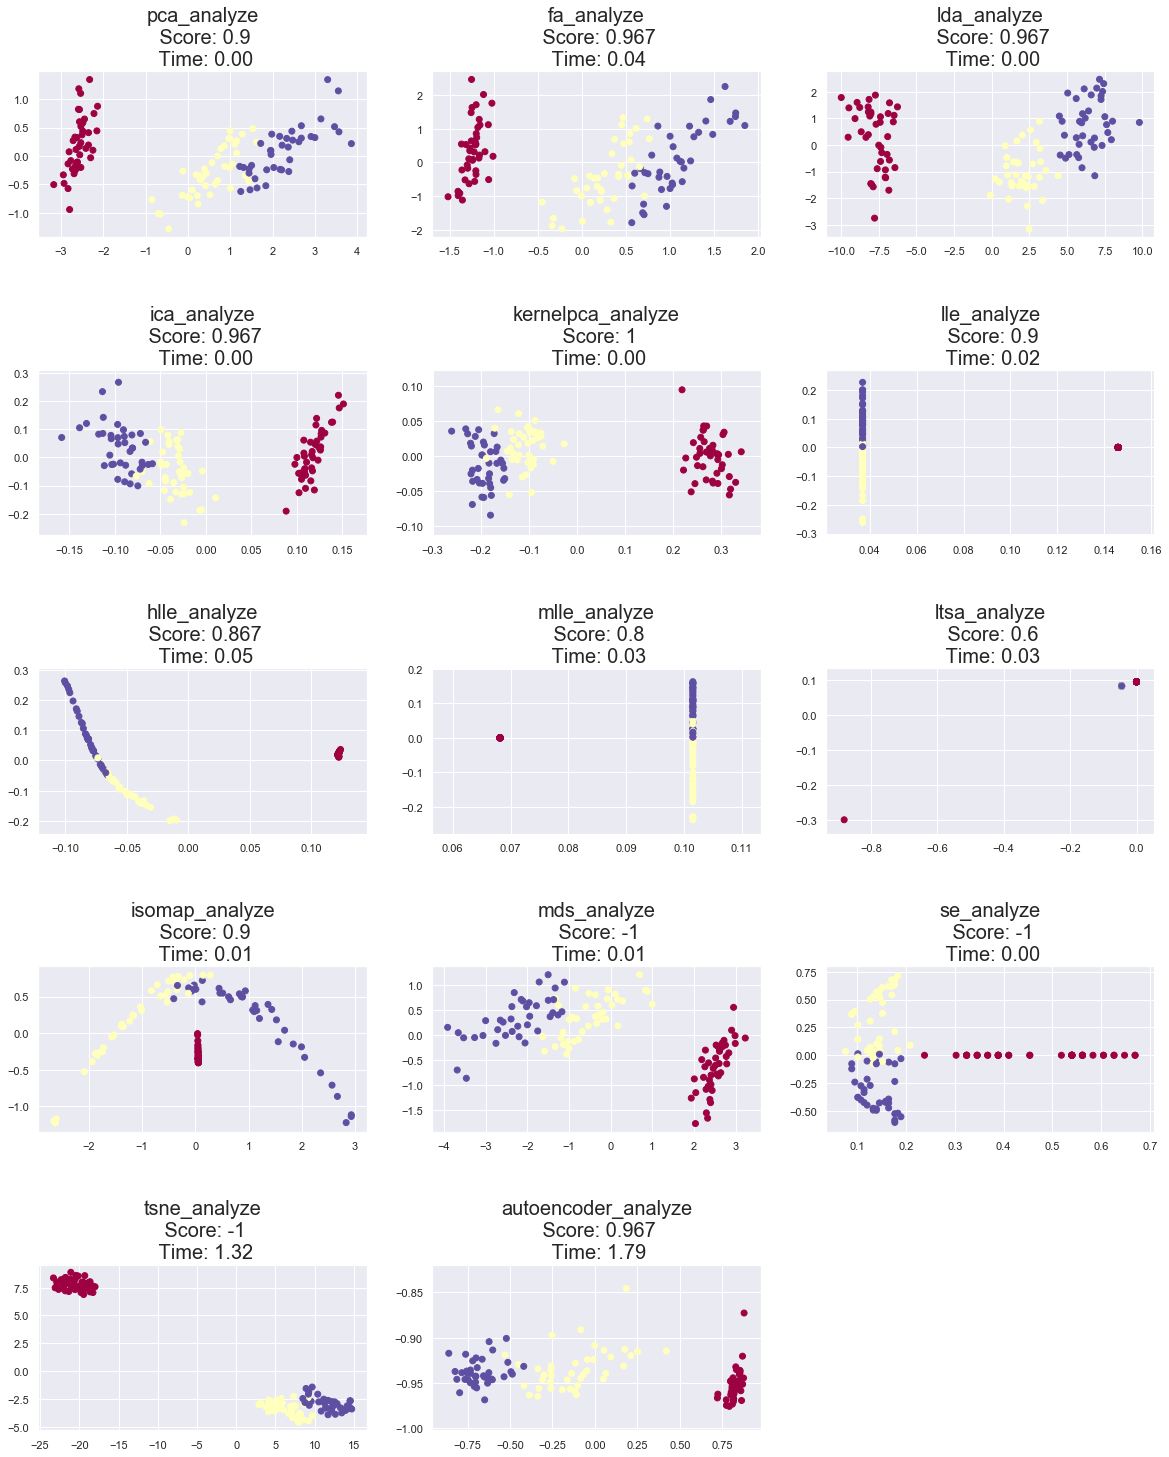

In [32]:
analyze(n_components=2, 
        problem='classification', 
#         methods=[pca_analyze, fa_analyze, lda_analyze, ica_analyze, kernelpca_analyze, lle_analyze, hlle_analyze, 
#                  mlle_analyze, ltsa_analyze, isomap_analyze, autoencoder_analyze], 
        methods='all',
        scoring=True)

S-curve dataset.

As we can see below, the best result we got using hlle method. The error is very low, however it is not the fastest method.

Autoencoder was again the slowest method. Pruning its parameters would improve its performance.

PCA finished after: 0.00s
Factor analysis finished after: 0.00s
ICA finished after: 0.00s
Kernel PCA finished after: 0.03s
LLE finished after: 0.16s
Hessian LLE finished after: 0.30s
Modified LLE finished after: 0.21s
LTSA finished after: 0.20s
Isomap finished after: 0.24s
Autoencoder finished after: 9.44s


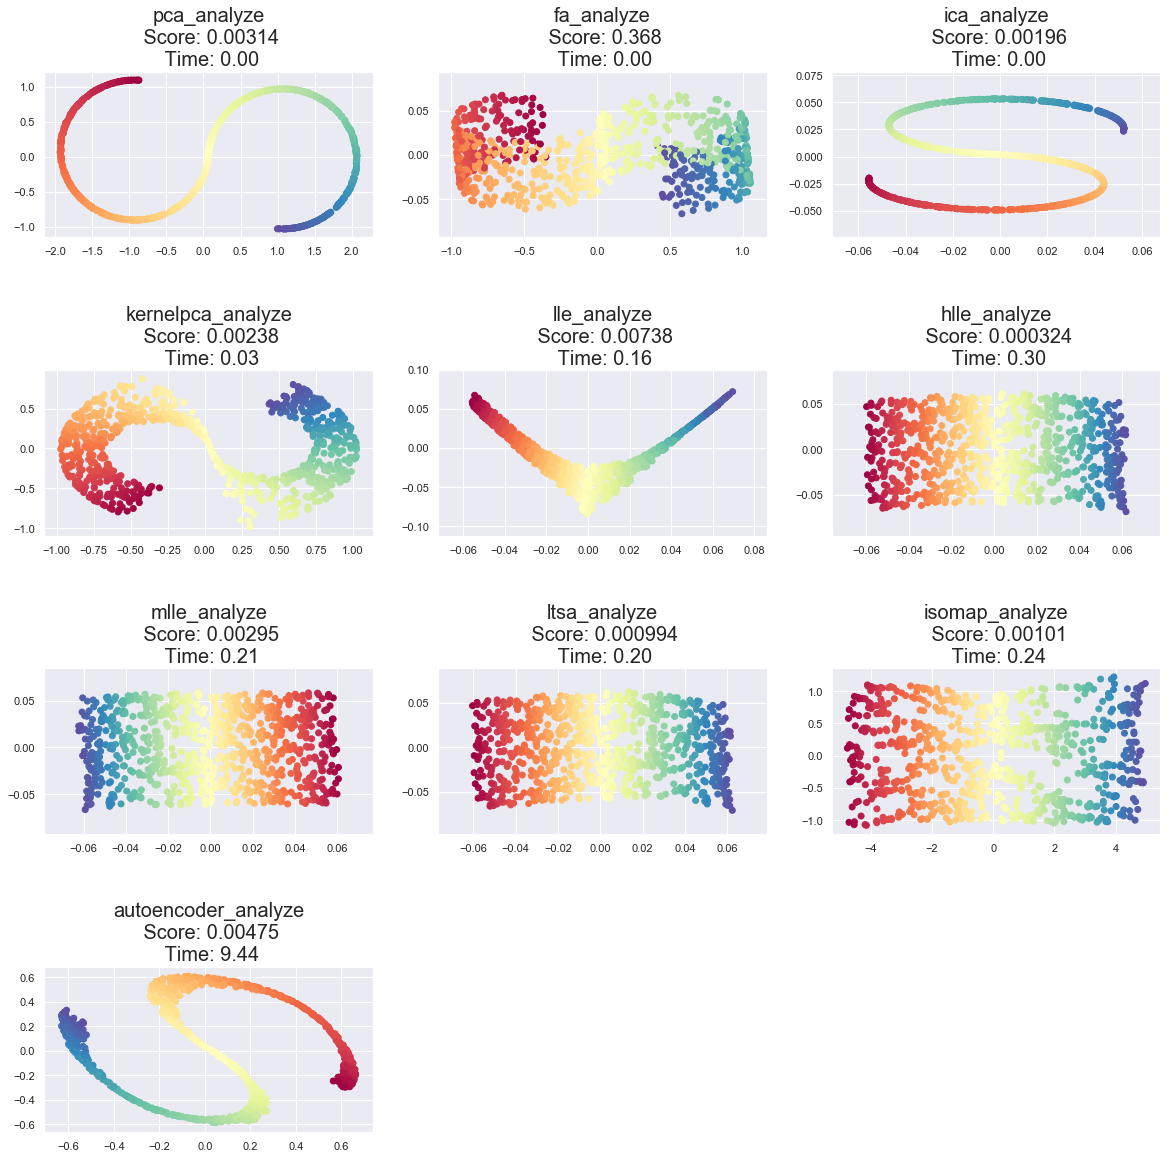

In [44]:
analyze(n_components=2, 
        problem='regression',
        methods=[pca_analyze, fa_analyze, lda_analyze, ica_analyze, kernelpca_analyze, lle_analyze, hlle_analyze, 
                 mlle_analyze, ltsa_analyze, isomap_analyze, autoencoder_analyze],
        scoring=True)

### Original dataset:

Iris dataset

We can see that performance on the original dataset with some irrelevant features is worse.

In [33]:
test_classification(X_train, X_test)

0.9

S-curve dataset

We can see that performance on the original dataset is worse.

In [45]:
test_regression(X_train, X_test)

0.0011240648896663212

### Modified dataset:

Here we can test some single methods if we want.

LDA finished after: 0.00s
Score: 0.9666666666666667


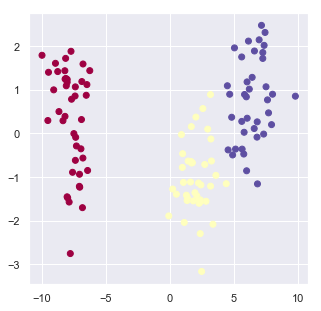

In [34]:
x_new = lda_analyze(n_components=2)

score = test_classification(x_new[1], x_new[2])

print('Score: ' + str(score))
visualize_data(x_new[1])